In [1]:
#!pip install igraph
import igraph as ig
import random as rd
import numpy as np
import matplotlib.pyplot as plt

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
params = {'legend.fontsize': 16,
          'legend.handlelength': 2.}
plt.rcParams.update(params)

In [2]:
color_dict = {"S": "blue", "I": "red", "R": "green"} #S=Suseptible, I=Infected and R=Recovered

In [3]:
#!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display
from __future__ import print_function
from ipywidgets.embed import embed_minimal_html, dependency_state

In [4]:
layout = widgets.Layout(width = "auto", height = "40px")

In [17]:
pop_slider = widgets.IntSlider(value = 100, min=0, max=100, step=1, description="Population Size: ", 
                               style={'description_width': 'initial', 'width': '800px'},
                               disabled=False, continuous_update=False, orientation="horizontal", readout=True, 
                               readout_format="d") #creating the slider
embed_minimal_html("population_size.html", views=pop_slider, title = "population size widget export")
display(pop_slider)

node_slider = widgets.IntSlider(value = 10, min=0, max=10, step=1, description="Number of Interactions: ",
                                style={'description_width': 'initial', 'width': '800px'},
                                disabled=False, continuous_update=False, orientation="horizontal", readout=True, 
                                readout_format="d") #creating the slider
embed_minimal_html("node.html", views=node_slider, title = "node widget export")
display(node_slider)


infected_slider = widgets.FloatSlider(value = 0.5, min=0.0, max=1.0, step=0.1, description="Virilance: ",
                                      style={'description_width': 'initial', 'width': '800px'}, 
                                      disabled=False, continuous_update=False, orientation="horizontal", readout=True, 
                                      readout_format=".1f") #creating the slider
embed_minimal_html("virilance.html", views=infected_slider, title = "virilance widget export")
display(infected_slider)

infect_len_slider = widgets.IntSlider(value = 5, min=30, max=360, step=1, description="Number of days infected: ", 
                                      style={'description_width': 'initial', 'width': '800px'}, 
                                      disabled=False, continuous_update=False, orientation="horizontal", readout=True, 
                                      readout_format="d") #creating the slider
embed_minimal_html("infection_len.html", views=infect_len_slider, title = "population size widget export")
display(infect_len_slider)

IntSlider(value=100, continuous_update=False, description='Population Size: ', style=SliderStyle(description_w…

IntSlider(value=10, continuous_update=False, description='Number of Interactions: ', max=10, style=SliderStyle…

FloatSlider(value=0.5, continuous_update=False, description='Virilance: ', max=1.0, readout_format='.1f', styl…

IntSlider(value=30, continuous_update=False, description='Number of days infected: ', max=360, min=30, style=S…

In [18]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
printmd("**Parameter Summary:**")
pop=pop_slider.value
print("Population Size:", pop)
edge_per_node = node_slider.value
print("Number of Interactions: ", edge_per_node)
p_infect = infected_slider.value
print("Virilance:", p_infect)
infect_len = infect_len_slider.value
print("Number of days of infection: ", infect_len)

**Parameter Summary:**

Population Size: 60
Number of Interactions:  7
Virilance: 0.5
Number of days of infection:  124


In [19]:
g = ig.Graph.Barabasi(pop, edge_per_node,power=1)
print(len(g.es)) # Number of edges
g.vs["state"] = "S" #is this assigning S as state?
g.vs["duration"] = 0
cl_coeff = g.transitivity_undirected()
print(cl_coeff) # Clustering coefficient

#Why is my clustering coefficient different to the one on github; the code is exactly the same.
#github clustering coefficient = 0.04420432220039293

392
0.31610044313146235


In [20]:
#Infecting 1 random node
i = rd.randint(0, pop-1)
g.vs[i]["state"] = "I" #assigning I as a state
nb_S = [pop]
nb_I = [1]
nb_R = [0]
max_deg_I = [g.vs[i].degree()]
tot_deg_I = [g.vs[i].degree()]

# The duration of infection is incremented for each infected node
# Each infected node can contamine its neighbours with probability _pinfect
# When the duration of infection becomes equal to _infectlen, the node becomes recovered (R)
# The maximum degree among infected nodes is recorded (_max_degI)

In [21]:
# Time-dependent rate of infection
probs_inf = [0.01,0.01,0.1,0.2,0.3,0.3,0.3,0.25,0.2,0.15,0.1,0.05,0.01,0.01]
print(len(probs_inf))


#most people develop symptomps after about 5.1 (5) days
#infectiousness starts about 2.5 (3) days before the onset of symptoms and peaks 0.625 (1) days before
#once symptoms develop, a person's viral load declines steadily, and they become increasingly less infectious
#people carry the virus (can infect) typically from 2-14 days

14


In [22]:
time_1perc = [] #time when 1% of the population is infected
time_1hub = [] #time when the first hub is infected
deg_cutoff = 8
for time in range(120): #no. of days
    if len(g.vs.select(state_eq = "I"))> pop*0.01  and len(time_1perc) is 0:
        time_1perc.append(time)
    for n in g.vs.select(state_eq = "I"): #iterates through each node in the network
        if g.vs[n.index]["duration"] is 0 and len(g.neighbors(n)) > deg_cutoff and len(time_1hub) is 0:
            time_1hub.append(time)
        g.vs[n.index]["duration"] += 1 #from day 0 to infect_len this node continues to infect
        day_inf = g.vs[n.index]["duration"]
        for nb in g.neighbors(n): #iterates through neighbours of that node
            if g.vs[nb]["state"] == "S": #if node is infected...
                r = rd.random() #random state
                #if r < p_infect: #random state says to infect according to p_infect
                if r < probs_inf[day_inf]:
                    g.vs[nb]["state"] = "I" #change state to infected
        #if g.vs[n.index]["duration"] >= infect_len: #after infect_len that node changes to recovered
        if g.vs[n.index]["duration"] >= rd.randrange(1,14):
            g.vs[n.index]["state"] = "R"
    nb_S.append(len(g.vs.select(state_eq = "S"))) #no. of susceptibles in population
    nb_I.append(len(g.vs.select(state_eq = "I"))) #no. of infecteds in population
    nb_R.append(len(g.vs.select(state_eq = "R"))) #no. of recovereds in population
    if len(g.vs.select(state_eq = "I")) > 0: #if there are infecteds
        max_deg_I.append(max(g.vs.select(state_eq = "I").degree())) #records max no. of neighbours within infecteds
        tot_deg_I.append(sum(g.vs.select(state_eq = "I").degree())) #records total no. of neighbours within infecteds
    else:
        max_deg_I.append(0)
print(time_1perc)
print(time_1hub)

[0]
[0]


<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\KUSHAB~1\AppData\Local\Temp/ipykernel_8064/86761077.py:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(g.vs.select(state_eq = "I"))> pop*0.01  and len(time_1perc) is 0:
C:\Users\KUSHAB~1\AppData\Local\Temp/ipykernel_8064/86761077.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if g.vs[n.index]["duration"] is 0 and len(g.neighbors(n)) > deg_cutoff and len(time_1hub) is 0:
C:\Users\KUSHAB~1\AppData\Local\Temp/ipykernel_8064/86761077.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if g.vs[n.index]["duration"] is 0 and len(g.neighbors(n)) > deg_cutoff and len(time_1hub) is 

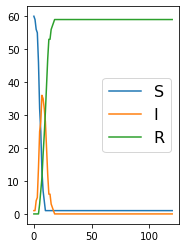

In [23]:
plt.subplot(1, 2, 1)
plt.plot(nb_S, label='S')
plt.plot(nb_I, label='I')
plt.plot(nb_R, label='R')
plt.legend()
#plt.subplot(1, 2, 2)
#plt.plot(max_deg_I, 'r-', label='max_deg_I')
#plt.plot(tot_deg_I, 'm-', label='tot_deg_I')
#plt.legend()

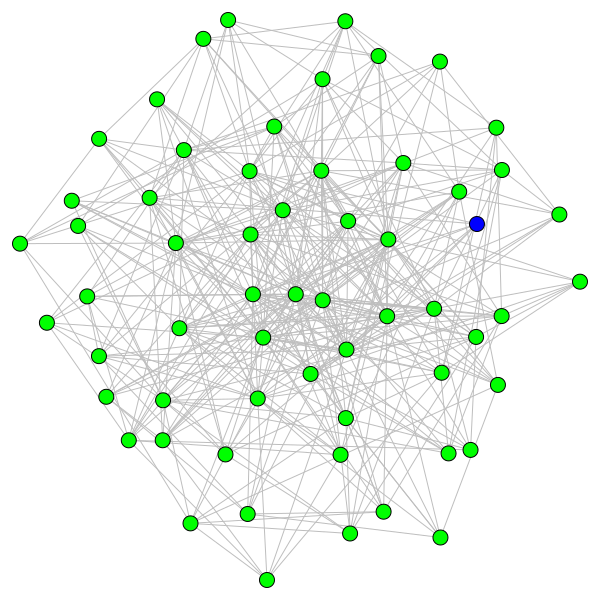

In [24]:
#!pip install python-cairo
#!pip install libcairo2
#!pip install python-cairo
#import pycairo

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_color"] = [color_dict[state] for state in g.vs["state"]]
visual_style["edge_color"] = "gray"
ig.plot(g, **visual_style)

In [14]:
import plotly as py
import plotly.graph_objects as go

In [15]:
#deg_val = sorted(set(g.vs.degree()))
#deg_hist = [g.vs.degree().count(x) for x in deg_val]
#plt.plot(deg_val,deg_hist)
#perc = sum(deg_hist[:deg_cutoff])/sum(deg_hist)
#print("{} % of nodes have a degree of {} or less.\n".format(round(perc*100,3),deg_cutoff))
#plt.vlines(deg_cutoff,0,max(deg_hist),'r')
#plt.xlabel("No. of Neighbours (Degree)",fontdict=font)
#plt.tick_params(axis='x', labelsize=14)
#plt.ylabel("No. of Nodes",fontdict=font)
#plt.tick_params(axis='y', labelsize=14)